# CASE STUDY: DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

<div class ="alert alert-block alert-info">
    BUSINESS PROBLEM:
    In order to effectively produce quality decisions in the modern credit card industry, knowledge must be gained through effective data analysis and modeling. Through the use of dynamic datadriven decision-making tools and procedures, information can be gathered to successfully evaluate all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and collections, respond to customer requests for help with proactive offers and service.
    
    Following are some of Mr. Watson’s questions to a Consultant (like you) to understand the customers spend & repayment behavior.
</div>

In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
customer_acquisition=pd.read_csv('Customer Acqusition.csv')
repayment=pd.read_csv('Repayment.csv')
spend=pd.read_csv('spend.csv')

In [3]:
customer_acquisition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [5]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


### 1. In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.

In [6]:
mean_age = customer_acquisition['Age'].mean()
customer_acquisition['Age']=customer_acquisition['Age'].apply(lambda x: mean_age if x <18 else x)

In [7]:
print(customer_acquisition)

     No Customer   Age        City   Product     Limit Company        Segment
0     1       A1  76.0   BANGALORE      Gold  500000.0      C1  Self Employed
1     2       A2  71.0    CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2     3       A3  34.0      COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3     4       A4  47.0      BOMBAY  Platimum   10001.0      C4           Govt
4     5       A5  56.0   BANGALORE  Platimum   10002.0      C5  Normal Salary
..  ...      ...   ...         ...       ...       ...     ...            ...
95   96      A96  54.0     CHENNAI    Silver  100000.0     C19   Salaried_Pvt
96   97      A97  58.0  TRIVANDRUM  Platimum   10000.0     C20           Govt
97   98      A98  51.0    CALCUTTA  Platimum   10001.0     C21  Normal Salary
98   99      A99  35.0    CALCUTTA  Platimum   10002.0     C22  Self Employed
99  100     A100  36.0      COCHIN    Silver  100000.0      C5   Salaried_MNC

[100 rows x 8 columns]


### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [8]:
# Merge Spend data with Customer Acquisition data 
merged_data = pd.merge(spend, customer_acquisition, on= 'Customer')
print(merged_data.head())

# Replace spend amount that exceeds the limit with 50% of the limit 
merged_data['Amount'] = merged_data.apply(lambda row: row['Limit'] * 0.5 if row['Amount'] > row['Limit'] else row['Amount'], axis=1) 

# Display the updated DataFrame 
print(merged_data)

   Sl No: Customer      Month       Type     Amount  No   Age       City  \
0       1       A1  12-Jan-04  JEWELLERY  485470.80   1  76.0  BANGALORE   
1       2       A1   3-Jan-04      PETRO  410556.13   1  76.0  BANGALORE   
2       3       A1  15-Jan-04    CLOTHES   23740.46   1  76.0  BANGALORE   
3       4       A1  25-Jan-04       FOOD  484342.47   1  76.0  BANGALORE   
4       5       A1  17-Jan-05     CAMERA  369694.07   1  76.0  BANGALORE   

  Product     Limit Company        Segment  
0    Gold  500000.0      C1  Self Employed  
1    Gold  500000.0      C1  Self Employed  
2    Gold  500000.0      C1  Self Employed  
3    Gold  500000.0      C1  Self Employed  
4    Gold  500000.0      C1  Self Employed  
      Sl No: Customer      Month          Type     Amount  No   Age  \
0          1       A1  12-Jan-04     JEWELLERY  485470.80   1  76.0   
1          2       A1   3-Jan-04         PETRO  410556.13   1  76.0   
2          3       A1  15-Jan-04       CLOTHES   23740.46   

###  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [9]:
# Merge Repayment data with Customer Acquisition data 
merged_data = pd.merge(repayment, customer_acquisition, on='Customer') 

# Replace repayment amount that exceeds the limit with the limit
merged_data['Amount'] = merged_data.apply(lambda row: row['Limit'] if row['Amount'] > row['Limit'] else row['Amount'], axis=1)

# Display the updated DataFrame
print(merged_data)

      SL No: Customer      Month     Amount  Unnamed: 4  No   Age       City  \
0        NaN       A1  12-Jan-04  495414.75         NaN   1  76.0  BANGALORE   
1        2.0       A1   3-Jan-04  245899.02         NaN   1  76.0  BANGALORE   
2        3.0       A1  15-Jan-04  259490.06         NaN   1  76.0  BANGALORE   
3        4.0       A1  25-Jan-04  437555.12         NaN   1  76.0  BANGALORE   
4        5.0       A1  17-Jan-05  165972.88         NaN   1  76.0  BANGALORE   
...      ...      ...        ...        ...         ...  ..   ...        ...   
1495   277.0       A7  22-Nov-05   55108.71         NaN   7  26.0     COCHIN   
1496   295.0       A7   3-Dec-05  100001.00         NaN   7  26.0     COCHIN   
1497   313.0       A7  23-Feb-05  100001.00         NaN   7  26.0     COCHIN   
1498   331.0       A7  31-Mar-06  100001.00         NaN   7  26.0     COCHIN   
1499   349.0       A7   3-Jan-04  100001.00         NaN   7  26.0     COCHIN   

     Product     Limit Company        S

### 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [10]:
distinct_customers = customer_acquisition['Customer'].nunique() 
print(f"Distinct Customers: {distinct_customers}")

Distinct Customers: 100


###  b. How many distinct categories exist?

In [11]:
distinct_categories = spend['Type'].nunique() 
print(f"Distinct Categories: {distinct_categories}")

Distinct Categories: 15


###  c. What is the average monthly spend by customers?

In [12]:
# Convert the Month column to datetime format
spend['Month'] = pd.to_datetime(spend['Month'], format='%d-%b-%y') 

# Extract year and month to create a YearMonth column 
spend['YearMonth'] = spend['Month'].dt.to_period('M')

# Group by Customer and YearMonth to calculate total spend per month 
monthly_spend = spend.groupby(['Customer', 'YearMonth'])['Amount'].sum().reset_index()

# Calculate the average monthly repayment for each customer 
average_monthly_spend = monthly_spend.groupby('Customer')['Amount'].mean() 
print(f"Average Monthly Spend by Customer:{average_monthly_spend}") 

Average Monthly Spend by Customer:Customer
A1      571411.417778
A10     349765.877273
A100    224786.880000
A11     376435.640833
A12     584503.617143
            ...      
A95     240401.500000
A96      54729.660000
A97     139018.260000
A98     284521.060000
A99      90184.220000
Name: Amount, Length: 100, dtype: float64


###  d. What is the average monthly repayment by customers?

In [13]:
# Convert the Month column to datetime format
repayment['Month'] = pd.to_datetime(repayment['Month'], format='%d-%b-%y')

# Extract year and month to create a YearMonth column 
repayment['YearMonth'] = repayment['Month'].dt.to_period('M') 

# Group by Customer and YearMonth to calculate total repayment per month 
monthly_repayment = repayment.groupby(['Customer', 'YearMonth'])['Amount'].sum().reset_index() 

# Calculate the average monthly repayment for each customer 
average_monthly_repayment = monthly_repayment.groupby('Customer')['Amount'].mean() 
print(f"Average Monthly Repayment by Customer:{average_monthly_repayment}")

Average Monthly Repayment by Customer:Customer
A1      528187.963333
A10     369564.752000
A100     69551.190000
A11     663866.753750
A12     555650.677333
            ...      
A95     369405.960000
A96     310992.300000
A97     121874.900000
A98     337815.570000
A99      25682.730000
Name: Amount, Length: 100, dtype: float64


###  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
### – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [14]:
# Merge the monthly spend and repayment data
merged_data = pd.merge(monthly_spend, monthly_repayment, on=['Customer', 'YearMonth'], suffixes=('_Spend', '_Repayment')) 

# Calculate the monthly profit (Repayment - Spend) 
merged_data['Monthly_Profit'] = merged_data['Amount_Repayment'] - merged_data['Amount_Spend']

# Calculate the interest earned on positive monthly profits 
interest_rate = 0.029 
merged_data['Interest_Earned'] = merged_data['Monthly_Profit'].apply(lambda x: x * interest_rate if x > 0 else 0)

# Summarize the profit for the bank for each month 
monthly_bank_profit = merged_data.groupby('YearMonth')['Interest_Earned'].sum() 

# Display the result 
print(f"Profit for the bank for each month:{monthly_bank_profit}")

Profit for the bank for each month:YearMonth
2004-01    311652.21026
2004-02     14230.15268
2004-03     16592.57997
2004-04     38951.43120
2004-05     30634.13231
2004-09      2541.36019
2004-11      5955.64967
2005-01     15055.54546
2005-02    326640.15759
2005-04     22677.87385
2005-05    438697.53248
2005-06     28616.63305
2005-07      9808.87793
2005-08     17194.51325
2005-09     11906.51695
2005-10     21071.89967
2005-11     71139.32667
2005-12     15044.34450
2006-01     11976.91822
2006-02     42299.68101
2006-03    390744.02974
2006-04    246230.81823
2006-05    220953.33450
2006-06     11709.34218
2006-07     42224.48604
2006-08      5671.55581
2006-09     10320.48752
2006-10      1141.13028
2006-11     29135.79772
2006-12      2869.19417
Freq: M, Name: Interest_Earned, dtype: float64


###  f. What are the top 5 product types?

In [15]:
# Group by Type and sum the Amount 
product_type_totals = spend.groupby('Type')['Amount'].sum().reset_index()

# Sort the product types by total amount spent in descending order 
top_product_types = product_type_totals.sort_values(by='Amount', ascending=False).head(5) 

# Display the top 5 product types 
print(f"Top 5 Product Types:{top_product_types}")

Top 5 Product Types:            Type       Amount
10         PETRO  49863174.09
4         CAMERA  41481571.96
7           FOOD  37773338.43
14  TRAIN TICKET  33067077.15
0     AIR TICKET  32955445.42


###  g. Which city is having maximum spend?

In [16]:
# Merge Spend data with Customer Acquisition data to get the city information 
merged_data = pd.merge(spend, customer_acquisition, on='Customer') 

# Group by City and sum the spend amounts 
city_spend_totals = merged_data.groupby('City')['Amount'].sum().reset_index()

# Find the city with the maximum total spend 
city_with_max_spend = city_spend_totals.loc[city_spend_totals['Amount'].idxmax()] 

# Display the city with the maximum spend p
print(f"City with the maximum spend:{city_with_max_spend }")

City with the maximum spend:City           COCHIN
Amount    73495349.26
Name: 4, dtype: object


### h. Which age group is spending more money?

In [17]:
# Merge Spend data with Customer Acquisition data to get the age information 
merged_data = pd.merge(spend, customer_acquisition, on='Customer')

# Define age groups 
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'] 
merged_data['AgeGroup'] = pd.cut(merged_data['Age'], bins=bins, labels=labels, right=False) 

# Group by AgeGroup and sum the spend amounts 
age_group_spend_totals = merged_data.groupby('AgeGroup')['Amount'].sum().reset_index() 

# Find the age group with the maximum total spend 
age_group_with_max_spend = age_group_spend_totals.loc[age_group_spend_totals['Amount'].idxmax()]

# Display the age group with the maximum spend 
print(f"Age group spending the most money:{age_group_with_max_spend}")

Age group spending the most money:AgeGroup          19-30
Amount      88238584.55
Name: 1, dtype: object


C:\Users\chitr\AppData\Local\Temp\ipykernel_15072\722272318.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spend_totals = merged_data.groupby('AgeGroup')['Amount'].sum().reset_index()


### i. Who are the top 10 customers in terms of repayment?

In [18]:
# Aggregate the repayment data by customer 
total_repayment_by_customer = repayment.groupby('Customer')['Amount'].sum().reset_index() 

# Sort the customers based on total repayment amount in descending order 
top_customers_by_repayment = total_repayment_by_customer.sort_values(by='Amount', ascending=False).head(10) 

# Display the top 10 customers by total repayment amount 
print(f"Top 10 Customers in Terms of Repayment:{top_customers_by_repayment}")

Top 10 Customers in Terms of Repayment:   Customer       Amount
58      A61  10539142.91
57      A60   9876290.74
5       A13   9572000.66
15      A22   9372561.68
14      A21   9056336.15
38      A43   8489871.46
40      A45   8448334.87
4       A12   8334760.16
43      A48   8292416.75
6       A14   7943268.63


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

City-wise spend on yearly basis:          City  Year       Amount
0    BANGALORE  2004  22110544.12
1    BANGALORE  2005  24612625.89
2    BANGALORE  2006  22619461.61
3       BOMBAY  2004  15249239.61
4       BOMBAY  2005  16485468.73
5       BOMBAY  2006  19093558.40
6     CALCUTTA  2004  16760270.01
7     CALCUTTA  2005  20399248.94
8     CALCUTTA  2006  27256241.06
9      CHENNAI  2004   7774320.55
10     CHENNAI  2005  13609921.49
11     CHENNAI  2006  11290746.03
12      COCHIN  2004  20376421.08
13      COCHIN  2005  25586567.10
14      COCHIN  2006  27532361.08
15       DELHI  2004   8664919.18
16       DELHI  2005   6548463.02
17       DELHI  2006   8303182.34
18       PATNA  2004   6584433.15
19       PATNA  2005  11380610.74
20       PATNA  2006   6644230.65
21  TRIVANDRUM  2004   6972433.90
22  TRIVANDRUM  2005   9872678.83
23  TRIVANDRUM  2006   8916126.68


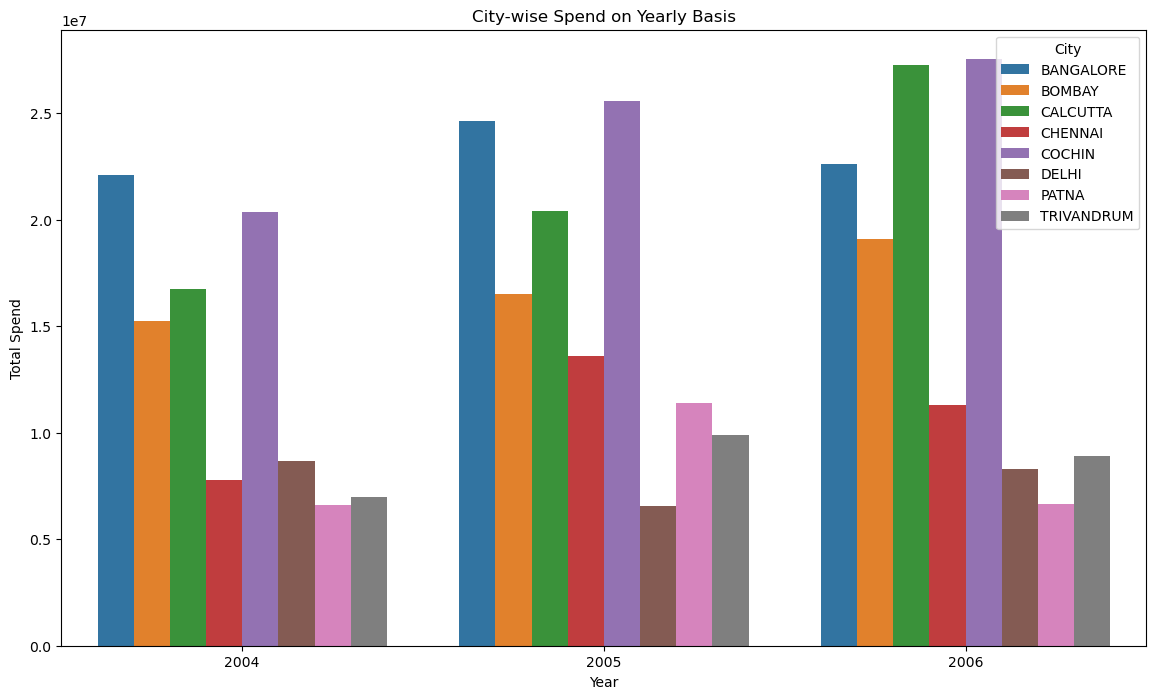

In [19]:
# Merge Spend data with Customer Acquisition data to get the city information
merged_data = pd.merge(spend, customer_acquisition, on='Customer') 

# Convert the Month column to datetime format 
merged_data['Month'] = pd.to_datetime(merged_data['Month'], format='%d-%b-%y') 

# Extract year from the Month column 
merged_data['Year'] = merged_data['Month'].dt.year 

# Group by City, Product Type, and Year to calculate the total spend 
city_product_yearly_spend = merged_data.groupby(['City', 'Year'])['Amount'].sum().reset_index() 

# Display the result 
print(f"City-wise spend on yearly basis:{city_product_yearly_spend}") 

# Graphical representation
plt.figure(figsize=(14, 8)) 
sns.barplot(data=city_product_yearly_spend, x='Year', y='Amount', hue='City')
plt.title('City-wise Spend on Yearly Basis') 
plt.xlabel('Year') 
plt.ylabel('Total Spend') 
plt.legend(title='City') 
plt.show()

### 4. Create graphs for
 a. Monthly comparison of total spends, city wise



C:\Users\chitr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chitr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


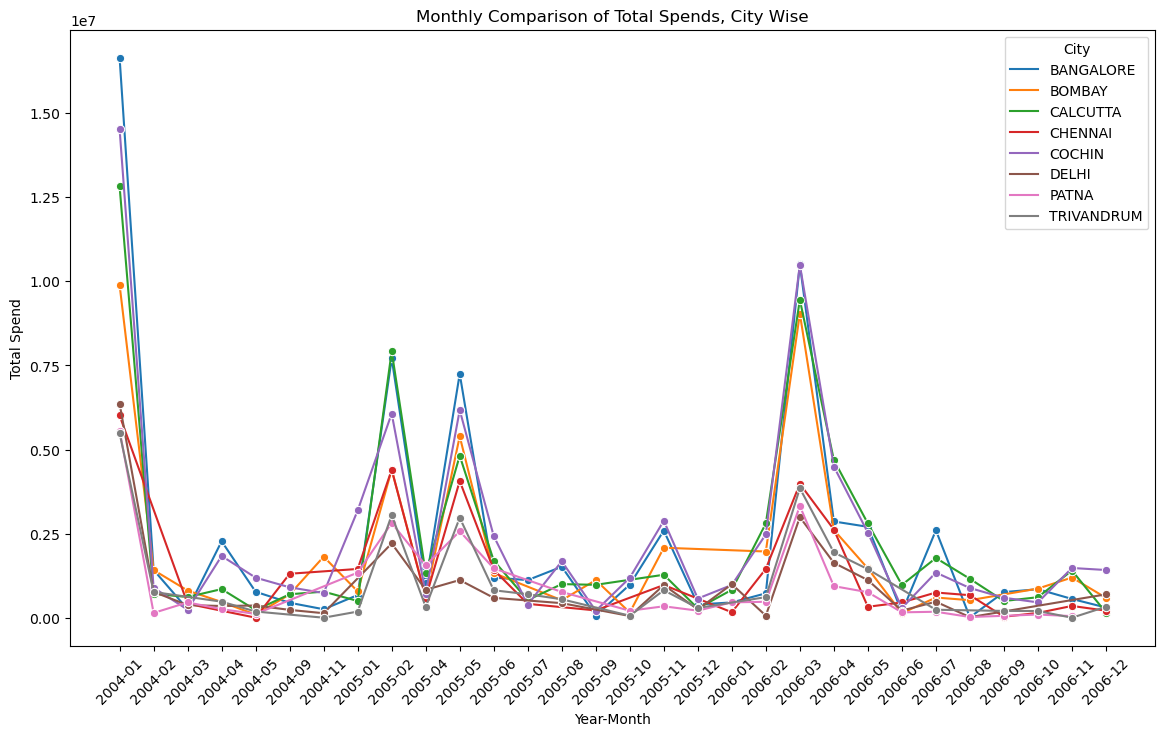

In [20]:
# Merge Spend data with Customer Acquisition data to get the city information 
merged_data = pd.merge(spend, customer_acquisition, on='Customer') 

# Convert the Month column to datetime format 
merged_data['Month'] = pd.to_datetime(merged_data['Month'], format='%d-%b-%y') 

# Extract year and month to create a YearMonth column 
merged_data['YearMonth'] = merged_data['Month'].dt.to_period('M').astype(str)

# Group by City and YearMonth to calculate the total spend 
city_monthly_spend = merged_data.groupby(['City', 'YearMonth'])['Amount'].sum().reset_index() 

# Graphical representation 
plt.figure(figsize=(14, 8))
sns.lineplot(data=city_monthly_spend, x='YearMonth', y='Amount', hue='City', marker='o')
plt.title('Monthly Comparison of Total Spends, City Wise') 
plt.xlabel('Year-Month') 
plt.ylabel('Total Spend') 
plt.legend(title='City') 
plt.xticks(rotation=45)
plt.show()

###  b. Comparison of yearly spend on air tickets


Yearly spend on air tickets:
   Year       Amount
0  2004   8370914.59
1  2005  14495718.73
2  2006  10088812.10


C:\Users\chitr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chitr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


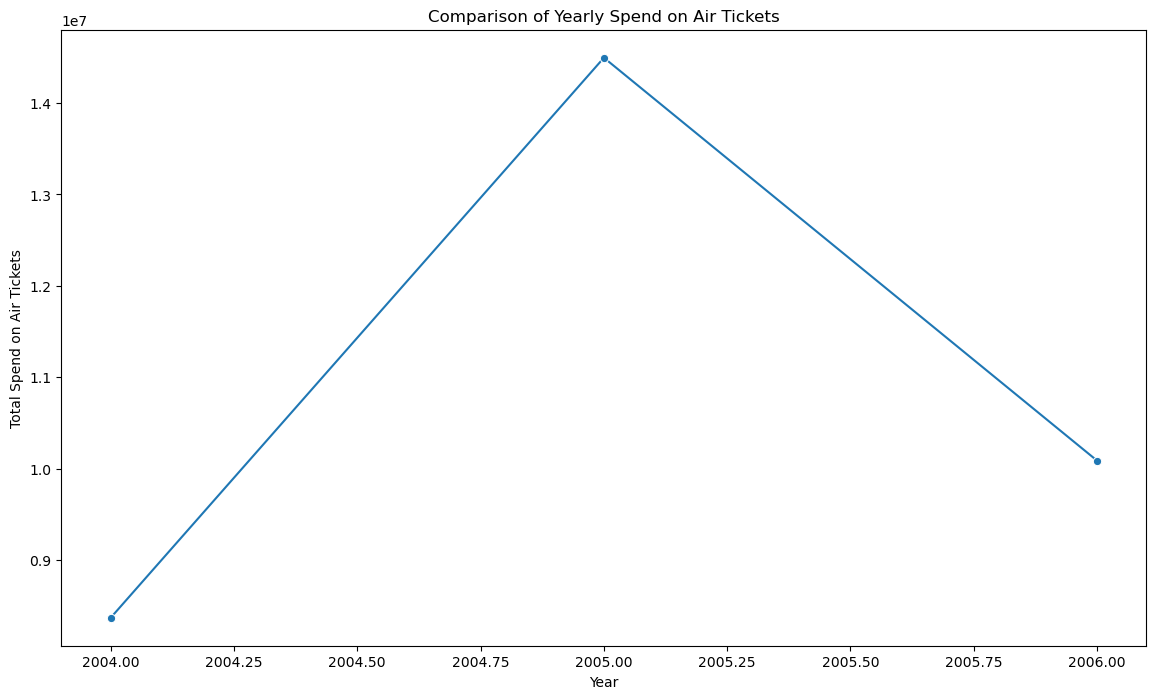

In [21]:
# Convert the Month column to datetime format
spend['Month'] = pd.to_datetime(spend['Month'], format='%d-%b-%y')

# Extract year from the Month column
spend['Year'] = spend['Month'].dt.year

# Filter the Spend data for "AIR TICKET" type
air_ticket_spend = spend[spend['Type'] == 'AIR TICKET']

# Group by Year to calculate the total spend on air tickets
yearly_air_ticket_spend = air_ticket_spend.groupby('Year')['Amount'].sum().reset_index()

# Display the result
print("Yearly spend on air tickets:")
print(yearly_air_ticket_spend)

# Graphical representation
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_air_ticket_spend, x='Year', y='Amount', marker='o')
plt.title('Comparison of Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Total Spend on Air Tickets')
plt.show()

###  c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

Monthly spend for each product:
             Type  Month_Num      Amount
0      AIR TICKET          1  6746692.43
1      AIR TICKET          2  6511466.11
2      AIR TICKET          3  2770019.73
3      AIR TICKET          4  2048842.43
4      AIR TICKET          5  6235385.71
..            ...        ...         ...
145  TRAIN TICKET          8   490688.62
146  TRAIN TICKET          9  1406931.59
147  TRAIN TICKET         10   212421.86
148  TRAIN TICKET         11  2689118.01
149  TRAIN TICKET         12    26024.81

[150 rows x 3 columns]


C:\Users\chitr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chitr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


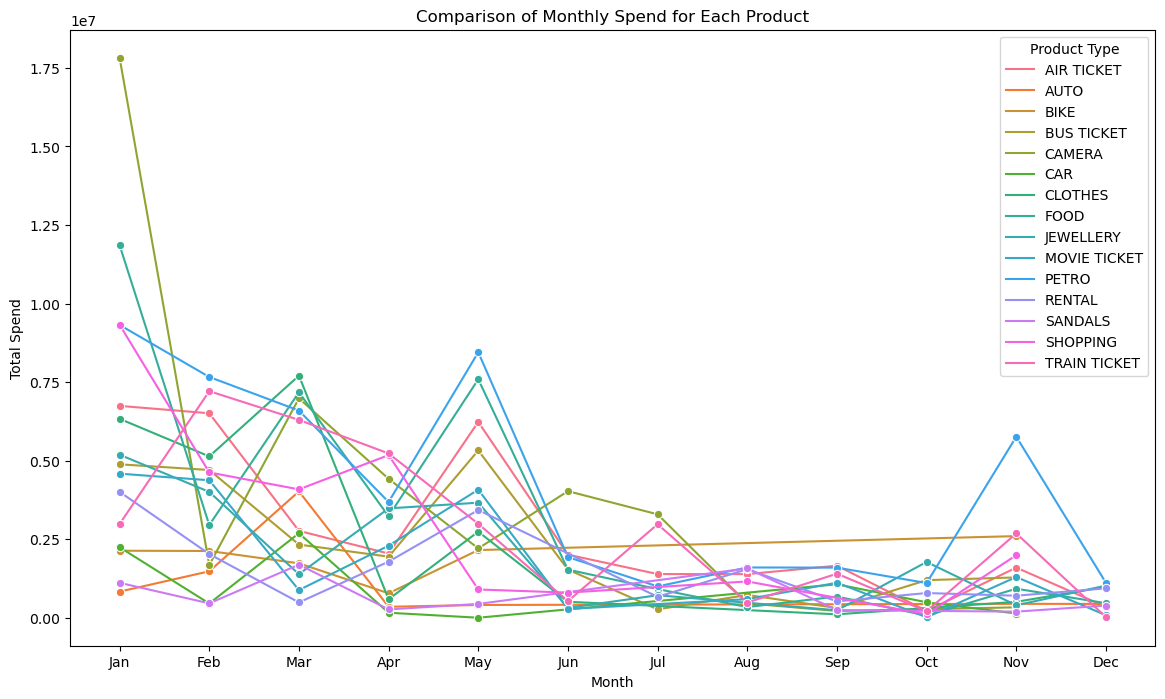

In [22]:
# Convert the Month column to datetime format 
spend['Month'] = pd.to_datetime(spend['Month'], format='%d-%b-%y') 

# Extract the month as a separate column
spend['Month_Num'] = spend['Month'].dt.month 

# Group by Type and Month_Num to calculate the total spend 
monthly_product_spend = spend.groupby(['Type', 'Month_Num'])['Amount'].sum().reset_index() 

# Display the result 
print("Monthly spend for each product:")
print(monthly_product_spend)

# Graphical representation 
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_product_spend, x='Month_Num', y='Amount', hue='Type', marker='o')
plt.title('Comparison of Monthly Spend for Each Product') 
plt.xlabel('Month')
plt.ylabel('Total Spend') 
plt.legend(title='Product Type')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


In [23]:
def top_customers_by_repayment(customer_acquisition, repayment, product, time_period):
    # Merge Customer Acquisition data with Repayment data
    merged_data = pd.merge(repayment, customer_acquisition, on='Customer')

    # Filter by Product
    filtered_data = merged_data[merged_data['Product'] == product]

    # Convert the Month column to datetime format
    filtered_data['Month'] = pd.to_datetime(filtered_data['Month'], format='%d-%b-%y')

    # Extract Year and Month
    if time_period == 'yearly':
        filtered_data['Time_Period'] = filtered_data['Month'].dt.year
    elif time_period == 'monthly':
        filtered_data['Time_Period'] = filtered_data['Month'].dt.to_period('M')

    # Group by City, Customer, and Time_Period to calculate the total repayment
    customer_repayment = filtered_data.groupby(['City', 'Customer', 'Time_Period'])['Amount'].sum().reset_index()

    # Function to get top 10 customers by repayment for each city
    def get_top_customers(group):
        return group.nlargest(10, 'Amount')

    # Apply the function to each city
    top_customers = customer_repayment.groupby('City').apply(get_top_customers).reset_index(drop=True)

    return top_customers

# Example usage
product = 'Gold'
time_period = 'yearly'
top_customers = top_customers_by_repayment(customer_acquisition, repayment, product, time_period)
print(top_customers)


          City Customer  Time_Period      Amount
0    BANGALORE      A43         2005  4006956.60
1    BANGALORE      A13         2005  3757673.00
2    BANGALORE      A13         2006  3477314.89
3    BANGALORE      A14         2004  2770261.30
4    BANGALORE      A14         2006  2681025.72
5    BANGALORE      A30         2005  2667746.38
6    BANGALORE      A43         2006  2576417.39
7    BANGALORE      A14         2005  2491981.61
8    BANGALORE      A30         2006  2486958.41
9    BANGALORE       A1         2004  2359797.84
10      BOMBAY      A17         2006  3127783.14
11      BOMBAY      A42         2005  3125758.43
12      BOMBAY      A12         2006  3118090.96
13      BOMBAY      A42         2004  3045914.71
14      BOMBAY      A12         2005  2877588.30
15      BOMBAY      A12         2004  2339080.90
16      BOMBAY      A62         2004  1744114.25
17      BOMBAY      A62         2006  1684085.69
18      BOMBAY      A62         2005  1541617.21
19      BOMBAY      

C:\Users\chitr\AppData\Local\Temp\ipykernel_15072\1134653509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Month'] = pd.to_datetime(filtered_data['Month'], format='%d-%b-%y')
C:\Users\chitr\AppData\Local\Temp\ipykernel_15072\1134653509.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Time_Period'] = filtered_data['Month'].dt.year
